## Présentation de l'étude de cas

## Traitement de l'étude de cas

Notre problème consiste à prédire si l'objet repéré par le sonar est un rocher ou une mine. C'est un problème de classification.


### 1. Chargement des données

In [22]:
# Charger le fichier de données sonar.all-data.csv et importer la bibliothèque nécessaire
import pandas as pd
observations=pd.read_csv('sonar.all-data.csv')

#Afficher l'intitulé des différentes colonnes 
#Que peut-on noter?
print(observations.columns.values)
observations
#Notre jeu d'instruction ne contient pas d'entête car la première observation est directement affichée
#On pourrait noter que la dernière feature correspond à l'objet détecté (R pour 'Rocher' et 'M' pour 'Mine')

#Combien de caractéristiques relatives aux signaux éléctriques disposons-nous?
print(observations.shape)
#Nous disposons ainsi de 60 siganux éléctriques et 208 observations
observations

['0.0200' '0.0371' '0.0428' '0.0207' '0.0954' '0.0986' '0.1539' '0.1601'
 '0.3109' '0.2111' '0.1609' '0.1582' '0.2238' '0.0645' '0.0660' '0.2273'
 '0.3100' '0.2999' '0.5078' '0.4797' '0.5783' '0.5071' '0.4328' '0.5550'
 '0.6711' '0.6415' '0.7104' '0.8080' '0.6791' '0.3857' '0.1307' '0.2604'
 '0.5121' '0.7547' '0.8537' '0.8507' '0.6692' '0.6097' '0.4943' '0.2744'
 '0.0510' '0.2834' '0.2825' '0.4256' '0.2641' '0.1386' '0.1051' '0.1343'
 '0.0383' '0.0324' '0.0232' '0.0027' '0.0065' '0.0159' '0.0072' '0.0167'
 '0.0180' '0.0084' '0.0090' '0.0032' 'R']
(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### 2. Préparation et netoyage des données

In [23]:
#Nommer chaque fréquence par lettre F associé à un numéro et nommer la dernière colonne par Objet
observations=pd.read_csv('sonar.all-data.csv',names=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18',
                                                    'F19','F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','F31','F32','F33','F34',
                                                    'F35','F36','F37','F38','F39','F40','F41','F42','F43','F44','F45','F46','F47','F48','F49','F50',
                                                    'F51','F52','F53','F54','F55','F56','F57','F58','F59','F60','Objet'])
observations

#Transformer la valeur du feature objet
#Si l'objet est une mine, il prendra la valeur 1 sinon il prendra la valeur 0
#Indice : utiliser la méthode astype(int)
observations['Objet']=(observations['Objet']=='M').astype(int)
observations
#Utiliser la fonction info() de notre dataframe et observer l'affichage 
print(observations.info())
display(observations.isnull().any())
observations.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      208 non-null    float64
 1   F2      208 non-null    float64
 2   F3      208 non-null    float64
 3   F4      208 non-null    float64
 4   F5      208 non-null    float64
 5   F6      208 non-null    float64
 6   F7      208 non-null    float64
 7   F8      208 non-null    float64
 8   F9      208 non-null    float64
 9   F10     208 non-null    float64
 10  F11     208 non-null    float64
 11  F12     208 non-null    float64
 12  F13     208 non-null    float64
 13  F14     208 non-null    float64
 14  F15     208 non-null    float64
 15  F16     208 non-null    float64
 16  F17     208 non-null    float64
 17  F18     208 non-null    float64
 18  F19     208 non-null    float64
 19  F20     208 non-null    float64
 20  F21     208 non-null    float64
 21  F22     208 non-null    float64
 22  F2

F1       False
F2       False
F3       False
F4       False
F5       False
         ...  
F57      False
F58      False
F59      False
F60      False
Objet    False
Length: 61, dtype: bool

(208, 61)

### 3. Analyse et exploration des données 

In [24]:
#Analysons nos données pour vérifier si on a une distribution équilibrée, à savoir autant 
#de mines que de rochers
#indice : utiliser la fonction groupby()
print(observations.groupby('Objet').size())

#Nous notons 111 mines(Type 1) et 97 rochers (type 0)
#Il n'y a pas une grande différence entre les deux catégories. Si par contre, il y en a un nombre
#prédominant d'une classe ça pourrait influer l'apprentissage qui pourrait ne pas se faire dans les 
#bonnes conditions

Objet
0     97
1    111
dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
#X = observations.drop('Objet', axis = 1)
#Y = observations[['Objet']]
#print(X.shape)
array=observations.values
#conversion des données en type décimal
X=array[:,0:-1].astype(float)
Y=array[:,-1]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
#random_state dans la fonction de creation des jeux de données
#permet d'obtenir les meme donnees d'apprentissage et de test à chaque itération de script

In [26]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
y_test

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1.])

In [27]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [28]:
#K Plus Proches Voisins
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print('K Plus Proches Voisins (accuracy): '+str(accuracy_score(prediction,y_test)))

K Plus Proches Voisins (accuracy): 0.7142857142857143


In [29]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[2,3,4,5,6,7]}

#Fit the model
model = GridSearchCV(knn, parameters, cv=5)
model.fit(X_train,y_train)

print ( model.best_params_ )
nombre=model.best_params_['n_neighbors']
knn=KNeighborsClassifier(nombre)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print('K Plus Proches Voisins avec C optimal (accuracy): '+str(accuracy_score(prediction,y_test)))

{'n_neighbors': 4}
K Plus Proches Voisins avec C optimal (accuracy): 0.7619047619047619


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
! pip install pydotplus
import pydotplus

#ETAPES A FAIRE POUR EXECUTER CE CODE
#Il faut installer graphviz  https://graphviz.gitlab.io/download/ 
#copier le chemin vers le répertoire bin (exemple C:\Program Files (x86)\Graphviz2.38\bin) et ajouter
#ce chemin dans la liste des variables d'environnement /PATH
#installer ensuite pydotplus à partir de jupyter notebook pip install pydotplus

# Create decision tree classifer object
#clf = DecisionTreeClassifier(random_state=0)
clf_decisiontree = DecisionTreeClassifier(criterion = "entropy",random_state=0)
#clf = DecisionTreeClassifier(criterion = "gini",random_state=0)

# Train model
model = clf_decisiontree.fit(X_train,y_train)

prediction=clf_decisiontree.predict(X_test)
print('Decision Tree Classifier (Accuracy) : '+str(accuracy_score(prediction,y_test)))
# Create DOT data

dot_data = tree.export_graphviz(clf_decisiontree, out_file=None, 
                                feature_names=observations.drop('Objet', axis = 1).columns.values)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PDF
graph.write_pdf("data.pdf")

# Create PNG
graph.write_png("data.png")


#Vous pouvez cherchez les parmètres optimaux ...
#https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html


Decision Tree Classifier (Accuracy) : 0.6904761904761905


True

In [31]:
from sklearn.ensemble import RandomForestClassifier

#Les paramètres les plus importants sont :
#n_estimators : integer, optional (default=10). Le nombre d’arbres.
#max_features : le nombre d’attributs à considérer à chaque split.
#max_samples : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.
#min_samples_leaf : le nombre minimal d’éléments dans un nœud feuille.
#oob_score : boolean. Estimer ou non l’erreur de généralisation OOB (Out of Bag).

clf = RandomForestClassifier(n_estimators=200)
# Train model
model = clf.fit(X_train,y_train)

prediction=clf.predict(X_test)
print('Random Forest Classifier (Accuracy) : '+str(accuracy_score(prediction,y_test)))


Random Forest Classifier (Accuracy) : 0.7380952380952381


In [32]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gradientBoosting=GradientBoostingClassifier()
gradientBoosting.fit(X_train,y_train)
prediction=gradientBoosting.predict(X_test)
print('Gradient Boosting : '+str(accuracy_score(prediction,y_test)))

Gradient Boosting : 0.7857142857142857


Extreme Gradient Boosting : 0.8571428571428571


<Axes: ylabel='Feature_name'>

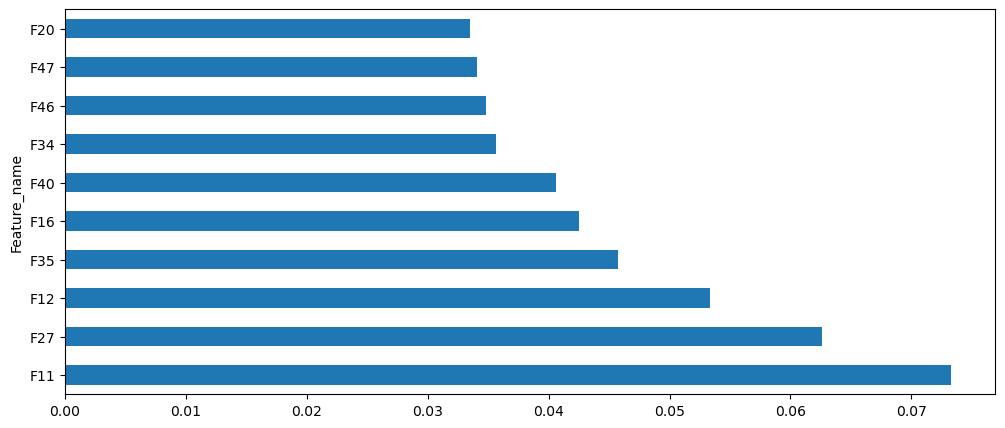

In [33]:
#lancer pip install xgboost à partir de l'invite de commande
import pandas as pd
#from sklearn.preprocessing import MinMaxScaler
! pip install xgboost
import xgboost as xgb
import pydotplus

Xboost = xgb.XGBClassifier()
Xboost.fit(X_train,y_train)
prediction=Xboost.predict(X_test)
print('Extreme Gradient Boosting : '+str(accuracy_score(prediction,y_test)))

type(Xboost.feature_importances_)
df=pd.DataFrame([observations.drop('Objet', axis = 1).columns.values,list(Xboost.feature_importances_)]).T
df.columns=['Feature_name','Feature_score']
df.sort_values('Feature_score',ascending=False,inplace=True)
df.set_index('Feature_name',inplace=True)
df.iloc[:10].plot(kind='barh',legend=False,figsize=(12,5))


### Comparaison de performances de classifieurs

In [34]:
# Liste des classifieurs évalués
classifiers = [('KNeighbors Classifier',KNeighborsClassifier(nombre)),
              ('Decision Tree Classifier',DecisionTreeClassifier(criterion = "entropy",random_state=0)),
               ('Gradient Boosting Classifier',GradientBoostingClassifier()),
           ('Random Forest Classifier',RandomForestClassifier(n_estimators=200)),
               ('Extreme Gradient Boosting',xgb.XGBClassifier())              ]


In [35]:
import pandas as pd        # charge un package pour le traitement des données
from sklearn.metrics import confusion_matrix

# Definition des métriques de performance
def perf_compute(clf, name):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name)
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    
    # On calcule le score en pourcentage
    perf['score'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    
    return perf

In [36]:
# On lance le calcule de performance
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort_values('score')

perfs['score'.split()].T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23876\446963202.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  perf = pd.Series(name=name)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23876\446963202.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  perf = pd.Series(name=name)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23876\446963202.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  perf = pd.Series(name=name)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23876\446963202.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this war

,Decision Tree Classifier,KNeighbors Classifier,Random Forest Classifier,Gradient Boosting Classifier,Extreme Gradient Boosting
score,69.047619,76.190476,76.190476,78.571429,85.714286


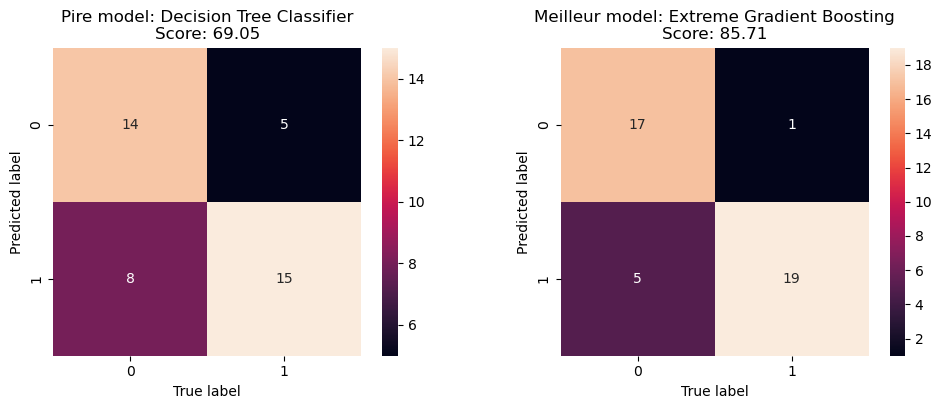

In [37]:
import seaborn as sns

def plot_conf_mat(perf, ax, title='Model'):
    """
    Affichage de la matrice de confusion
    """
    sns.heatmap(perf.conf_mat[0], ax=ax, square=True, annot=True)
    ax.set_title('{}: {}\nScore: {:.2f}'.format(title, perf.name, perf.score))
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

# Affichage du plus mauvais et du meilleur classifieur
# Les classifieurs sont classés par scores croissant
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
plot_conf_mat(perfs.iloc[0], ax=axs[0], title='Pire model')
plot_conf_mat(perfs.iloc[-1], ax=axs[1], title='Meilleur model')

In [38]:
#Appliquer l'algorithme SVM

#machine vecteurs supports avec variation de paramètres et recherche des valeurs optimales avec la validation croisée
#Les réglages à effectuer : Le noyau et ses paramètres + La constante de tolérance C 
#Tests avec 5 échantillons de validation croisee 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Cas 1
paramètres = {'kernel': ['linear'], 'C': list(np.logspace(-3, 3, 5))}
recherche_optimisations=GridSearchCV(SVC(gamma='auto'),paramètres, cv=5)
recherche_optimisations.fit(X_train,y_train)
print ('Cas 1 : \n Meilleurs paramètres : ')
parametre=recherche_optimisations.best_params_ 
print (parametre)
SVM=SVC(C=parametre["C"],kernel=parametre["kernel"],gamma='auto')
SVM.fit(X_train,y_train)
prediction=SVM.predict(X_test)
print('Machine Vecteurs Supports -Linear Kernel  (accuracy): '+str(accuracy_score(prediction,y_test)))
#mesure des performances

VN,FP,FN,VP=metrics.confusion_matrix(y_test,prediction).ravel()#tn fp fn tp
print('VN,FP,FN,VP : ') 
print(VN,FP,FN,VP)

precision=precision_score(y_test,prediction)
print('precision :'+str(precision))
recall=recall_score(y_test,prediction)
print('recall :'+str(recall))
F1=f1_score(y_test,prediction)
print('F1 :'+str(F1))
#Cas 2
#définition d'une plage de valeurs à tester
Cs = list(np.logspace(-3, 3, 5))
gammas = 10. ** np.arange(1, 2)
degrees = np.r_[1, 2, 3]
paramètres = {'kernel': ['poly'], 'C': Cs, 'gamma': gammas, 'degree': degrees}
recherche_optimisations=GridSearchCV(SVC(),paramètres, cv=5)
recherche_optimisations.fit(X_train,y_train)
print ('\n Cas 2: \n Meilleurs paramètres : ')
parametre=recherche_optimisations.best_params_ 
print (parametre)
SVM=SVC(C=parametre["C"],kernel=parametre["kernel"],degree=parametre["degree"],gamma=parametre["gamma"])
SVM.fit(X_train,y_train)
prediction=SVM.predict(X_test)
print('Machine Vecteurs Supports -Poly Kernel  (accuracy): '+str(accuracy_score(prediction,y_test)))
#mesure des performances

VN,FP,FN,VP=metrics.confusion_matrix(y_test,prediction).ravel()#tn fp fn tp
print('VN,FP,FN,VP : ') 
print(VN,FP,FN,VP)

precision=precision_score(y_test,prediction)
print('precision :'+str(precision))
recall=recall_score(y_test,prediction)
print('recall :'+str(recall))
F1=f1_score(y_test,prediction)
print('F1 :'+str(F1))



Cas 1 : 
 Meilleurs paramètres : 
{'C': 1.0, 'kernel': 'linear'}
Machine Vecteurs Supports -Linear Kernel  (accuracy): 0.7619047619047619
VN,FP,FN,VP : 
15 7 3 17
precision :0.7083333333333334
recall :0.85
F1 :0.7727272727272727

 Cas 2: 
 Meilleurs paramètres : 
{'C': 0.001, 'degree': 2, 'gamma': 10.0, 'kernel': 'poly'}
Machine Vecteurs Supports -Poly Kernel  (accuracy): 0.7857142857142857
VN,FP,FN,VP : 
16 6 3 17
precision :0.7391304347826086
recall :0.85
F1 :0.7906976744186046


In [39]:
#regression logistique
from sklearn.linear_model import LogisticRegression
regression_logistique=LogisticRegression(solver='lbfgs')
regression_logistique.fit(X_train,y_train)
prediction=regression_logistique.predict(X_test)
print('Regression Logistique (accuracy): '+str(accuracy_score(prediction,y_test)))
#mesure des performances

VN,FP,FN,VP=metrics.confusion_matrix(y_test,prediction).ravel()#tn fp fn tp
print('VN,FP,FN,VP : ') 
print(VN,FP,FN,VP)

precision=precision_score(y_test,prediction)
print('precision :'+str(precision))
recall=recall_score(y_test,prediction)
print('recall :'+str(recall))
F1=f1_score(y_test,prediction)
print('F1 :'+str(F1))

Regression Logistique (accuracy): 0.8095238095238095
VN,FP,FN,VP : 
17 5 3 17
precision :0.7727272727272727
recall :0.85
F1 :0.8095238095238095


In [40]:
#Perceptron, on pourrait également utiliser SGDClassifier 
from sklearn.linear_model import Perceptron
perceptron = Perceptron(tol=1e-3, random_state=0)
perceptron.fit(X_train,y_train)
prediction=perceptron.predict(X_test)
print('Perceptron (accuracy): '+str(accuracy_score(prediction,y_test)))
#mesure des performances

VN,FP,FN,VP=metrics.confusion_matrix(y_test,prediction).ravel()#tn fp fn tp
print('VN,FP,FN,VP : ') 
print(VN,FP,FN,VP)

precision=precision_score(y_test,prediction)
print('precision :'+str(precision))
recall=recall_score(y_test,prediction)
print('recall :'+str(recall))
F1=f1_score(y_test,prediction)
print('F1 :'+str(F1))

Perceptron (accuracy): 0.5952380952380952
VN,FP,FN,VP : 
17 5 12 8
precision :0.6153846153846154
recall :0.4
F1 :0.4848484848484849


In [41]:
#Tester le BaggingClassifier en spécifiant différents modèles de base à importer de sklearn.ensemble

In [42]:
#Consultez ce lien https://github.com/jeffprosise/Machine-Learning et tester des exemples et y intégrer d'autres modèles de machines learning

In [43]:
##https://github.com/selva86/datasets